In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 4.1MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=5ec99b894ec12fa3b950ffa9aa56b915230d0cee78ab9c69ade9ea8ff170300b
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


# 구간분할
* 데이터에 구간을 만들어서 **구간별** 예측을 수행.
* 원본 데이터에 구간정보를 부여해 준다.

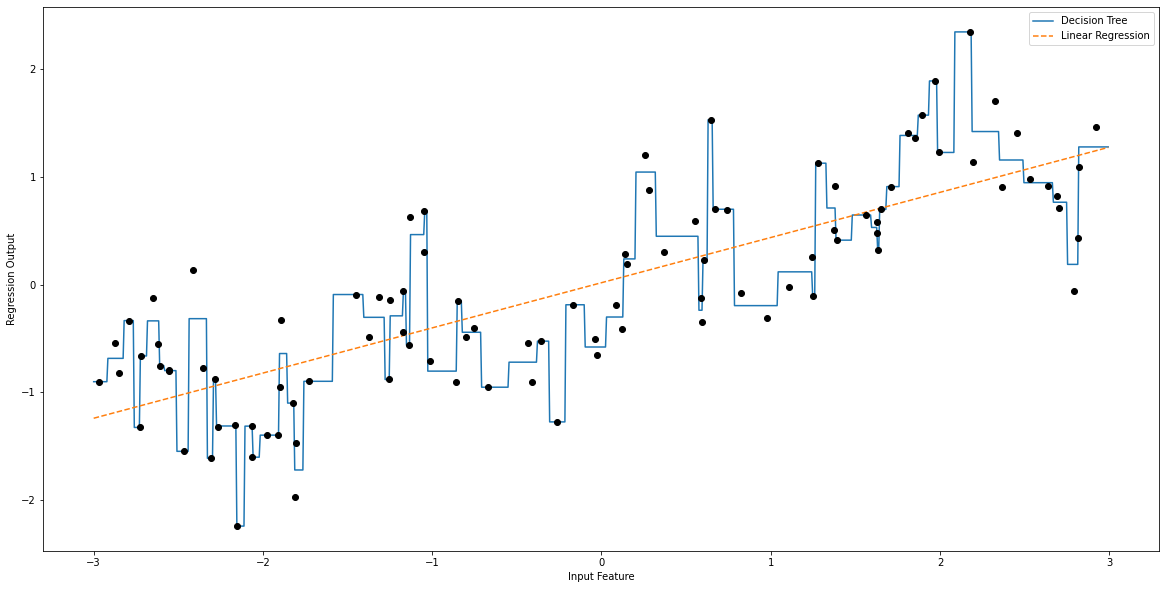

In [ ]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)

plt.rcParams['figure.figsize']=(20, 10)
plt.plot(line, reg.predict(line), label="Decision Tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--' , label="Linear Regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc='best')
plt.show()

## 구간별 예측을 하기 위해 구간정보를 만들어 준다.

In [ ]:
bins = np.linspace(-3, 3, 11)
print("구간 : {}".format(bins))

구간 : [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [ ]:
# 데이터들을 구간에 집어 넣는 작업이 필요
#  너는 여기 구간에 속해 있어 - np.digitize

which_bin = np.digitize(X, bins=bins) # 어떠한 데이터 X 가 어떤 bins(구간)에 속하는지 알아내기
print("데이터 포인트 : \n{}".format(X[:5]))
print("\n데이터 포인트의 소속 구간 : \n{}".format(which_bin[:5]))

데이터 포인트 : 
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터 포인트의 소속 구간 : 
[[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


## 구간 데이터는 정수형태의 데이터 지만, 범주형 변수의 성질을 띄고있음!
* One Hot Encoding을 해 준다.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False) # 희소행렬로 안만들기

encoder.fit(which_bin)

X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
X_binned.shape

(100, 10)

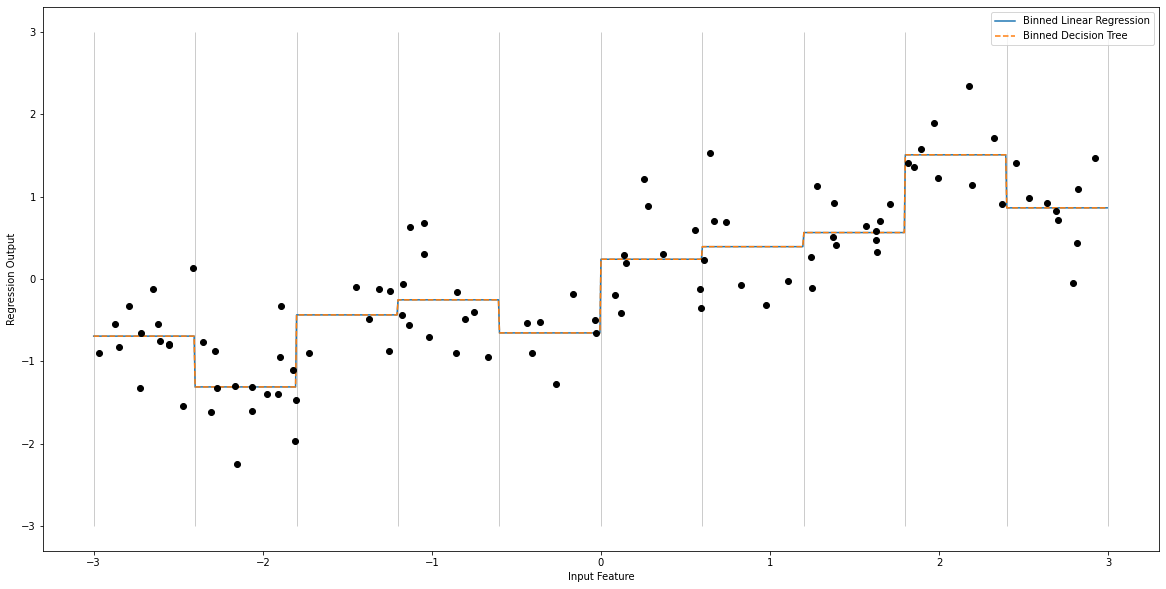

In [ ]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='Binned Linear Regression')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='Binned Decision Tree')
plt.plot(X[:, 0], y, 'o', c='k')

plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.show()

# 상호작용과 다항식
* 상호작용 ( interaction ) : 데이터들 끼리의 관계를 설정하는 것. ( 보통은 곱이나, 연관된 특성을 넣어주는 것 )
  * 구간데이터(X_binned)와 실제 그 구간에 있었던 데이터(X)

In [ ]:
X_combined = np.hstack([X, X_binned])
X_combined.shape

(100, 11)

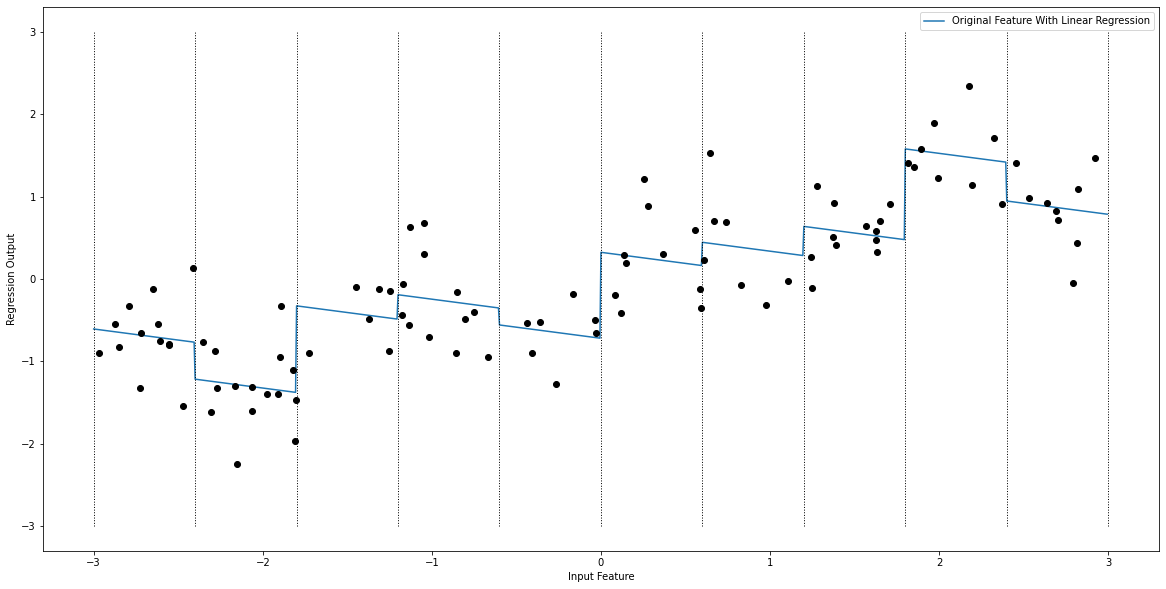

In [ ]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned]) # 예측할 선에 대해서도 One-Hot-Encoding된 데이터를 추가함
plt.plot(line, reg.predict(line_combined), label='Original Feature With Linear Regression')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1) #x축은 각 구간(bin, bin), y축은 -3 부터 3까지 표현

plt.legend(loc='best')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.plot(X[:, 0], y, 'o', c='k')

* X축 특성이 하나이기 때문에 기울기도 하나다.
* 구간 데이터와 더불어 구간 데이터의 X 값이 같이 있으면? - X가 속한 구간 데이터와 실제 그 구간에 속한 X의 값을 동시에 볼 수 있다.

In [ ]:
X_product = np.hstack([X_binned, X * X_binned])
X_product.shape

(100, 20)

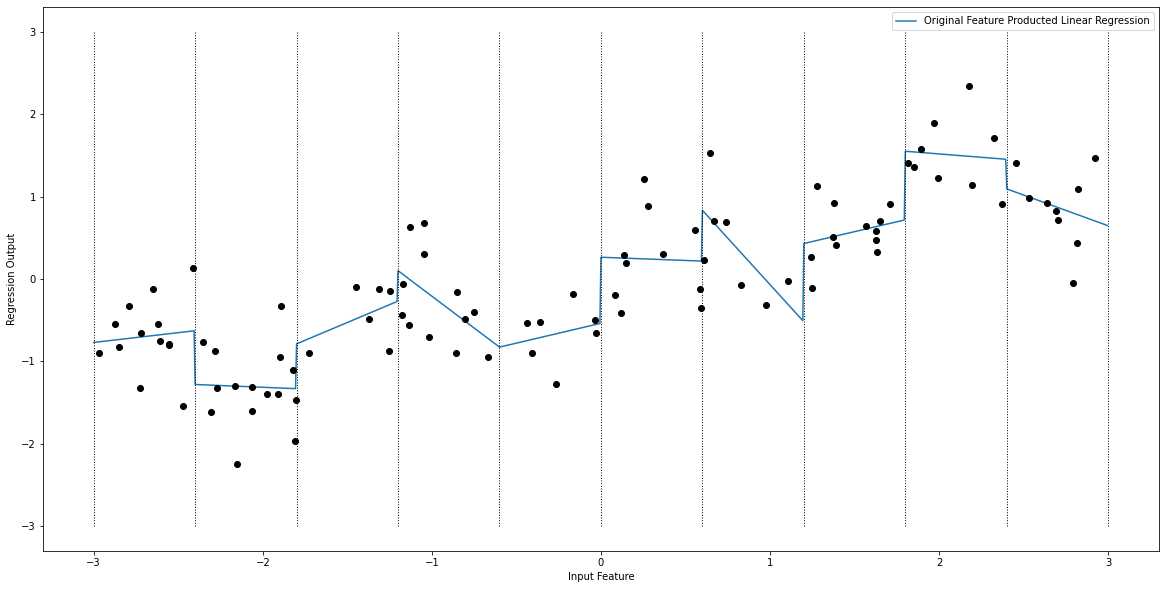

In [ ]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned]) # 예측해야 할 데이터도 훈련한 데이터와 같이 상호작용을 구함
plt.plot(line, reg.predict(line_product), label='Original Feature Producted Linear Regression')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc='best')
plt.show()

# 원본 특성의 다항식 추가
* 구간 분할은 연속형 특성을 확장하는 하나의 방법.
* 원본 특성($x$)의 다항식을 추가하는 방법
  * 어떠한 특성 $x$에 대해 $x^2$, $x^3$, $x^4$, $\cdots$ 등등을 새롭게 추가하는 방식
* 사이킷 런의 `preprocessing` 모듈의 `PolynomialFeatures`에 구현

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# x의 10제곱 까지의 고차항을 추가
# include_bias가 True면 편향을 1로 추가한다. - 값이 1인 특성이 하나가 추가가 된다.
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)

X_poly = poly.transform(X)

* 10차원 ( `degree=10` )으로 변환 했기 때문에 9개의 특성이 새롭게 추가 된다. (즉 원본 1개 + 새로운거 9개 = 10개)

* `include_bias=True`로 했으면 편향이 하나 더 붙으니까 11개

In [ ]:
print("원본 X의 shape : {}".format(X.shape))
print("다차원 X의 shape : {}".format(X_poly.shape))

원본 X의 shape : (100, 1)
다차원 X의 shape : (100, 10)


In [ ]:
print("원본 X의 원소 : \n{}".format(X[:5]))
print("다차원 X의 원소 : \n{}".format(X_poly[:5]))

원본 X의 원소 : 
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
다차원 X의 원소 : 
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [ ]:
print("항의 이름(컬럼명) : {}".format(poly.get_feature_names()))

항의 이름(컬럼명) : ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


## PolynomialFeatures + LinearRegression 사용하기

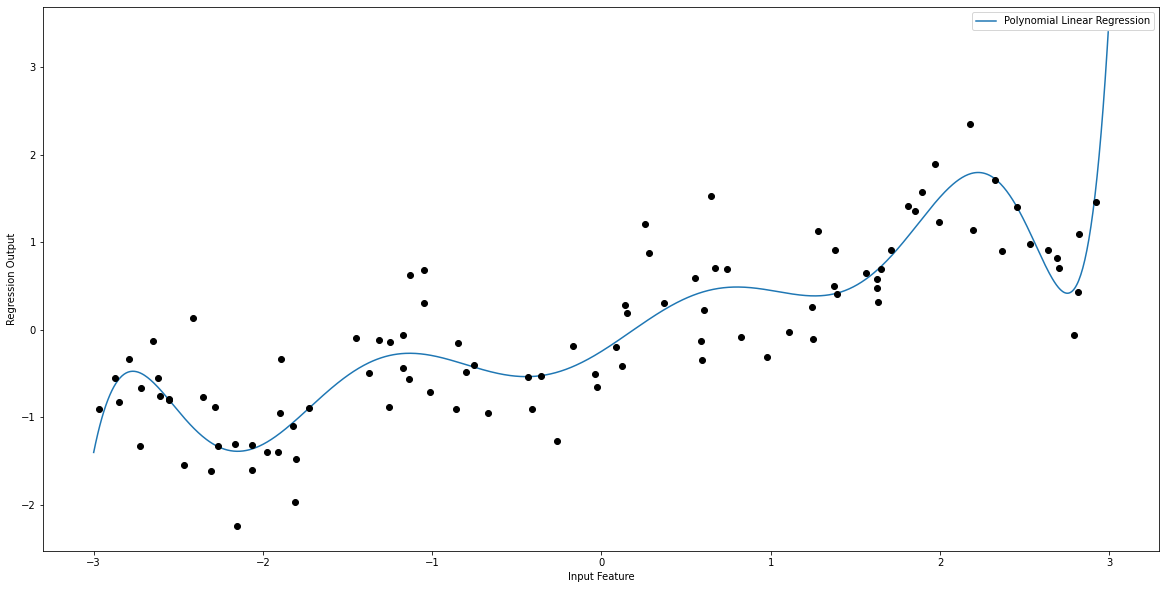

In [ ]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label="Polynomial Linear Regression")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc='best')
plt.show()

## SVM과의 비교

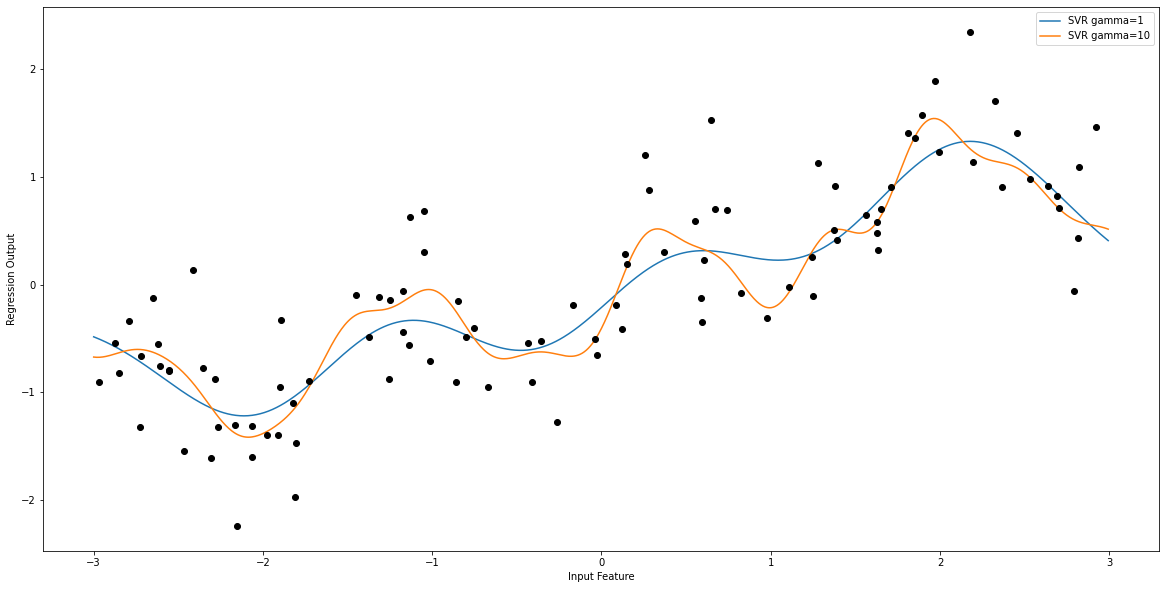

In [ ]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc='best')
plt.show()

# 보스턴 주택 가격 데이터셋을 이용한 다항식 추가 테스트

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(
    boston['data'],
    boston['target'],
    random_state=0
)

# 데이터 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
x = [1,2,3]
y = [[4,5,6],
     [7,8,9]]
     

In [ ]:
# 차수를 2로 하여 다항식을 추가
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)

X_train_poly = poly.transform(X_train_scaled)
X_test_poly  = poly.transform(X_test_scaled)

print("원본 X_train의 형상 : {}".format(X_train.shape))
print("다항식 X_train_poly의 형상 : {}".format(X_train_poly.shape))

원본 X_train의 형상 : (379, 13)
다항식 X_train_poly의 형상 : (379, 105)


In [ ]:
"다항식 특성의 이름 : \n{}".format(poly.get_feature_names())

"다항식 특성의 이름 : \n['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']"

## 선형 모델로 테스트 하기

In [ ]:
# 다항식을 추가하지 않은 경우
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때의 점수 : {:.3f}".format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때의 점수 : {:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때의 점수 : 0.621
상호작용 특성이 있을 때의 점수 : 0.753


## 트리 모델 테스트 하기

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수 : {:.3f}".format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수 : {:.3f}".format(rf.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수 : 0.795
상호작용 특성이 있을 때 점수 : 0.774
